###  Introuction
The  Nelson-Siegel-Svensson (NSS) model  is an extension of the  Nelson-Siegel model  used for modeling the term structure of interest rates. It's widely used to fit and forecast interest rates across different maturities.The first form describes the yield curve by capturing the level, slope, and curvature of interest rates. The  Svensson extension  (1994) added two more parameters, making the model more flexible, especially for yield curves with hump.

#### Interpretation of Parameters
-  \( \beta_0 \) : Determines the long-term level of rates (when t-->+infinite)
-  \( \beta_1 \) : Controls the steepness of the curve at short maturities.
-  \( \beta_2 \) : Controls the curvature or hump in the middle of the curve.
-  \( \beta_3 \) : Adds flexibility to capture multiple humps.
-  \( \lambda_1 \)  and  \( \lambda_2 \) : Control how fast the short-term and medium-term effects decay.

#### Advantages of NSS Model
- Flexibility: Captures complex yield curve shapes (e.g., multiple humps).
- Smoothness: Produces smooth yield curves, ideal for fitting real-world data.
- Parameter Interpretability: Intuitive economic interpretations of the parameters.

####  Use Cases
- Fitting Yield Curves: Fits observed yields across different maturities.
- Forecasting Interest Rates: Used for forecasting term structures.
- Risk Management: Helps in interest rate risk management and pricing fixed-income instruments.

#### . Limitations
- Overfitting: With more parameters, there's a risk of overfitting.
- Interpretability of Extra Terms: The additional term can be harder to justify economically.



### Calbrating in python

The calibration of the Nelson-Siegel-Svensson (NSS) model involves estimating the model parameters (β0, β1, β2, β3, λ1, λ2) by fitting the model to observed bond yield data. In Python, you can use optimization techniques to minimize the error between the observed yields and the yields predicted by the NSS model.

Compute params : [ 0.00686161 -0.25033285  0.44927459 -0.16238054  2.60574426  1.65105551]
Output :    message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 7.038498572658566e-06
        x: [ 6.862e-03 -2.503e-01  4.493e-01 -1.624e-01  2.606e+00
             1.651e+00]
      nit: 135
      jac: [-6.621e-07  2.272e-07  1.699e-07  3.052e-07 -1.114e-09
             4.419e-08]
 hess_inv: [[ 7.258e-02  3.535e+01 ... -8.090e+01 -7.393e+01]
            [ 3.535e+01  1.380e+05 ... -2.822e+05 -2.424e+05]
            ...
            [-8.090e+01 -2.822e+05 ...  5.873e+05  5.040e+05]
            [-7.393e+01 -2.424e+05 ...  5.040e+05  4.342e+05]]
     nfev: 1099
     njev: 157


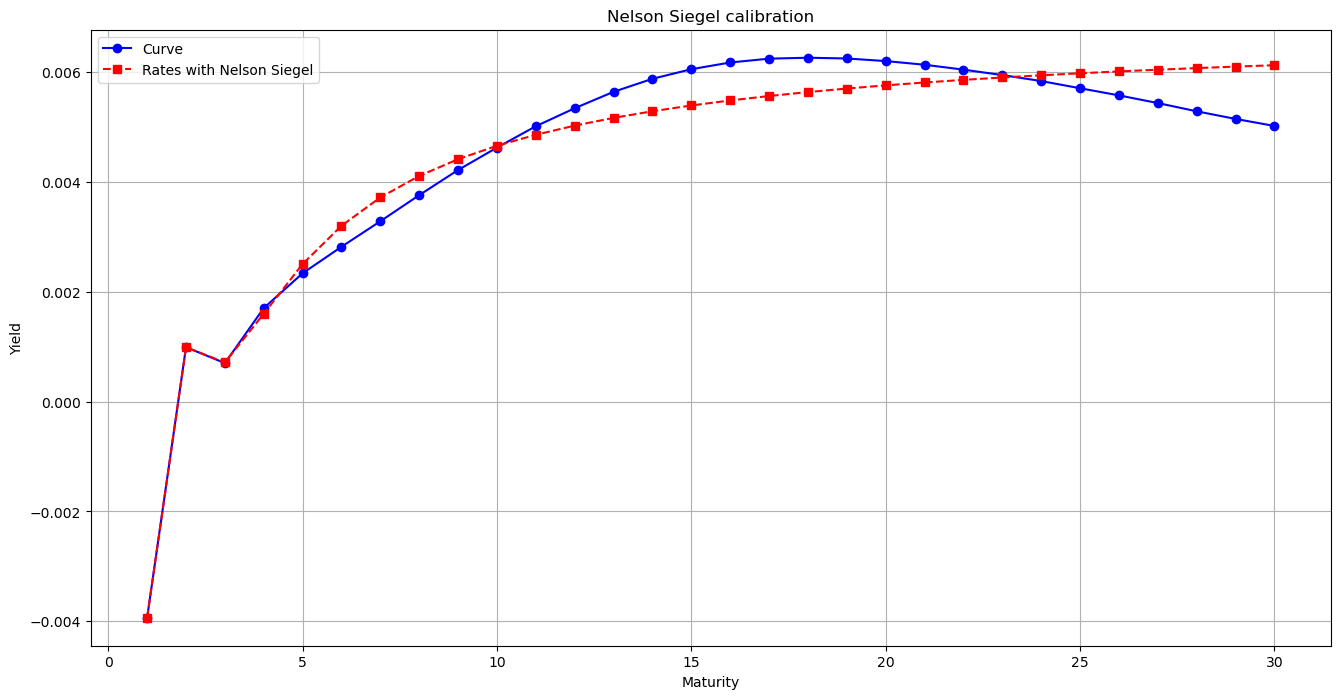

In [111]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

maturities = np.array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])
yields  =    np.array([-0.003937,  0.000992,  0.000701,  0.001704,  0.002338,  0.002821,0.003286,  0.003762,  0.00422 ,  0.004628,  0.005017,  0.005345, 0.005644,  0.005881,  0.006056,  0.006178,  0.006248,  0.006265,0.006251,  0.006204,  0.006137,  0.006048,  0.005949,  0.00584 , 0.005709,  0.005579,  0.005439,  0.005289,  0.00515 ,  0.005022])

def nelson_zc_rate(t, bo,b1,b2,b3, a1, a2):
  
    return bo + b1* ( 1 - np.exp(-a1*t))/(a1*t) + b2* (( 1 - np.exp(-a1*t))/(a1*t) - np.exp(-a1*t)) + b3* (( 1 - np.exp(-a2*t))/(a2*t) - np.exp(-a2*t))


def solve(params, maturities, yields):
    
    def fit(params, maturities, yields):
        bo,b1,b2,b3, a1, a2 = params
        computed_yield = nelson_zc_rate(maturities, bo,b1,b2,b3, a1, a2)

        return  np.sum((computed_yield-yields)**2)
    
    opt_sol = minimize(fit, params, args=(maturities, yields) , method="BFGS" , tol= 1.4e-6)
   
    return opt_sol
   
    
initial_params =(0.1, 0.1, 0.1, 0.1, 1.0, 1.0)
opt_sol = solve(initial_params, maturities, yields)

predicted_yield = nelson_zc_rate(maturities, *opt_sol.x)

print('Computed params :' , opt_sol.x)
print('Output : ',opt_sol)

plt.figure(figsize=(16, 8))
plt.plot(maturities, yields, marker='o', linestyle='-', color='b', label='Curve')
plt.plot(maturities, predicted_yield, marker='s', linestyle='--', color='r', label='Rates with Nelson Siegel')

plt.xlabel('Maturity')
plt.ylabel('Yield')
plt.title('Nelson Siegel calibration')
plt.grid(True)
plt.legend()
plt.show()
